In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v3/gempy_format/"
geo_model = gp.create_model("StratBR_BES_v3")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -20000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "merged_sp_reduced_more_z_ajusted.csv",
    path_o=data_path + "orientations_points_v3_6.csv",
)

Active grids: ['regular']


StratBR_BES_v3  2023-09-25 11:05

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes_89,Default series,1,#015482,1
1,bes_90,Default series,2,#9f0052,2
2,bes_91,Default series,3,#ffbe00,3
3,bes_92,Default series,4,#728f02,4
4,bes_93,Default series,5,#443988,5
5,bes_94,Default series,6,#ff3f20,6
6,bes_95,Default series,7,#5DA629,7
7,bes_96,Default series,8,#4878d0,8
8,bes_97,Default series,9,#ee854a,9
9,bes_98,Default series,10,#6acc64,10


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "bes_89",
            "bes_90",
            "bes_91",
            "bes_92",
            "bes_93",
            "bes_94",
            "bes_95",
            "bes_96",
            "bes_97",
            "bes_98",
            "bes_99",
            "bes_100",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes_89,Strat_Series,1,#015482,1
1,bes_90,Strat_Series,2,#9f0052,2
2,bes_91,Strat_Series,3,#ffbe00,3
3,bes_92,Strat_Series,4,#728f02,4
4,bes_93,Strat_Series,5,#443988,5
5,bes_94,Strat_Series,6,#ff3f20,6
6,bes_95,Strat_Series,7,#5DA629,7
7,bes_96,Strat_Series,8,#4878d0,8
8,bes_97,Strat_Series,9,#ee854a,9
9,bes_98,Strat_Series,10,#6acc64,10


In [5]:
geo_model.get_data()

X         Y      Z    smooth  surface  \
surface_points 0          0.0       0.0  -3344  0.000002   bes_89   
               12     10000.0       0.0  -4370  0.000002   bes_89   
               24     20000.0       0.0  -4087  0.000002   bes_89   
               36     30000.0       0.0  -4559  0.000002   bes_89   
               48     40000.0       0.0  -4786  0.000002   bes_89   
...                       ...       ...    ...       ...      ...   
               7031  150000.0  148000.0 -14455  0.000002  bes_100   
               7043  160000.0  148000.0 -14847  0.000002  bes_100   
               7055  170000.0  148000.0 -15043  0.000002  bes_100   
               7067  179000.0  148000.0 -15065  0.000002  bes_100   
orientations   0          0.0       0.0  -3344  0.010000   bes_89   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               12             NaN           NaN  NaN  
               24             NaN           NaN  NaN  
               36             NaN           NaN  NaN  
               48             NaN           NaN  NaN  
...                           ...           ...  ...  
               7031           NaN           NaN  NaN  
               7043           NaN           NaN  NaN  
               7055           NaN           NaN  NaN  
               7067           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  

[7069 rows x 8 columns]

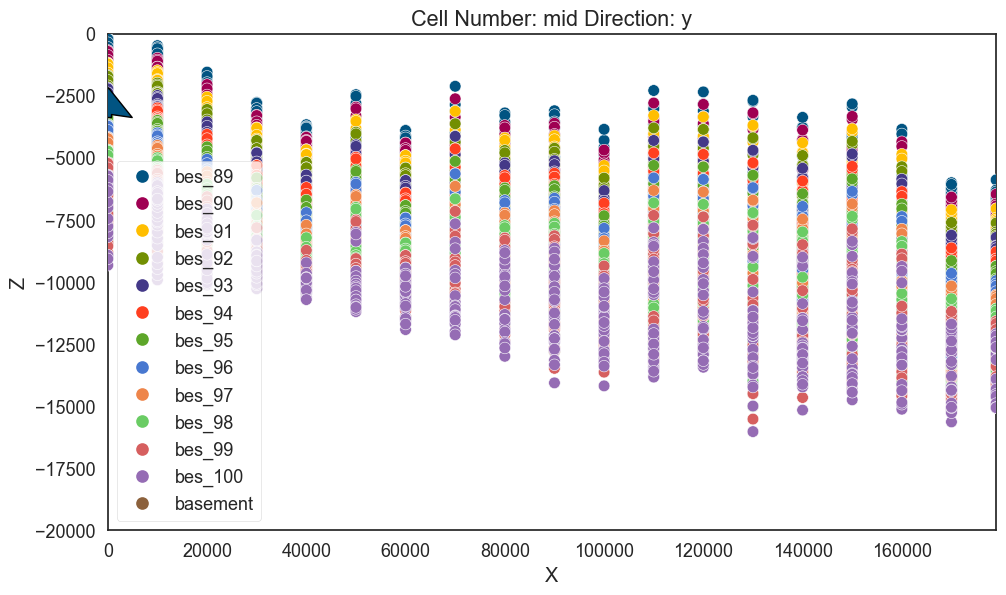

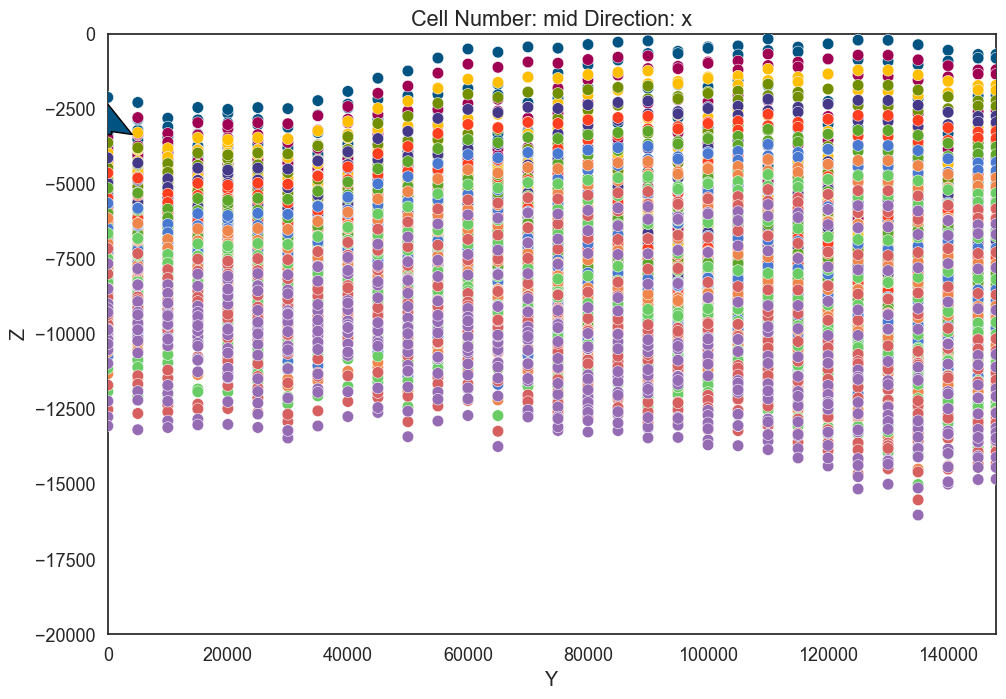

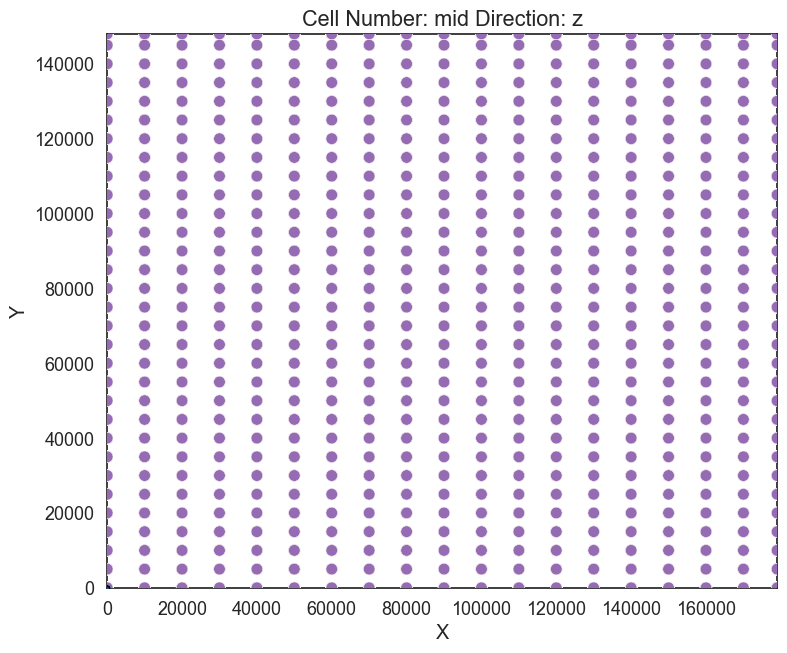

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [8]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                  233120.1407
$C_o$            1293928571.428571
drift equations             [3, 3]
Wall time: 22.5 s


In [9]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 2min 46s



Lithology ids 
  [13. 13. 13. ...  1.  1.  1.] 

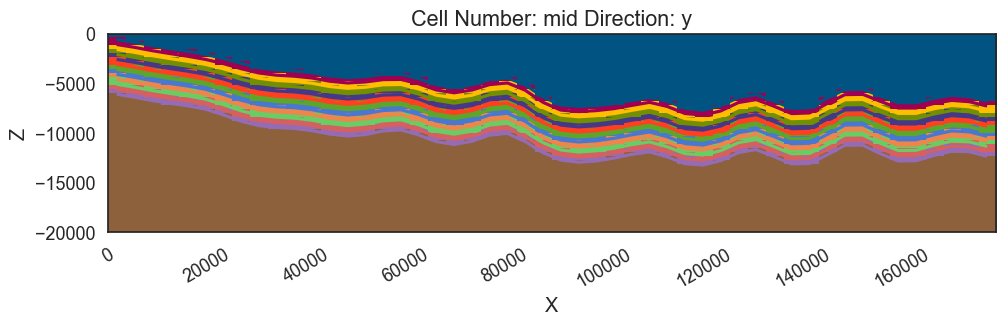

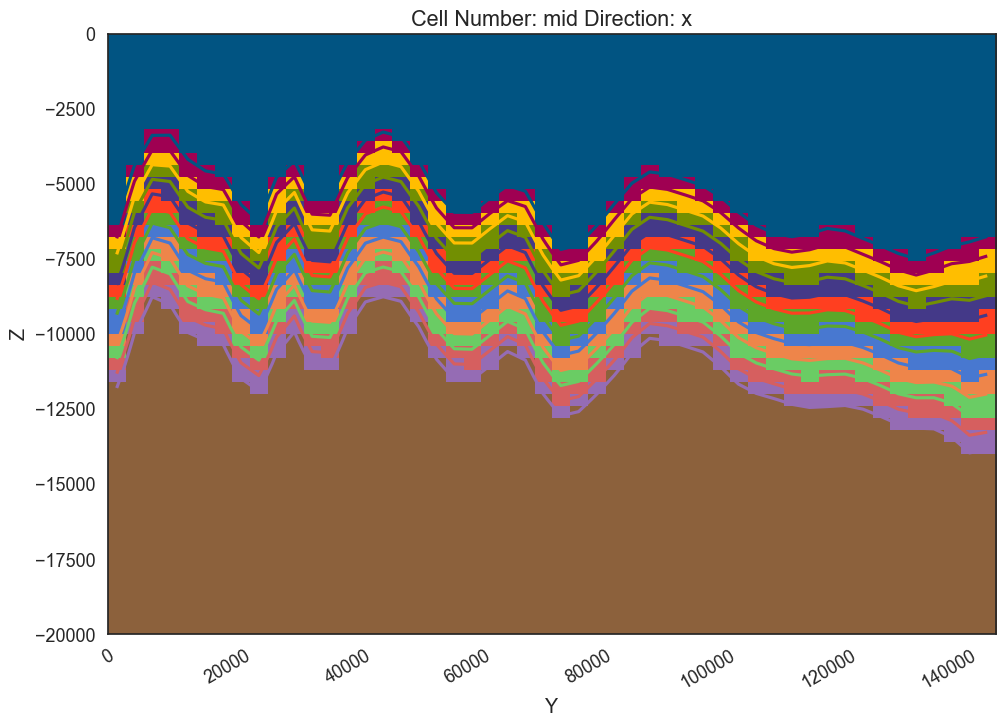

In [10]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [11]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=2)

In [12]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

'topo_init = tp.compute_topology(\n    geo_model, direction="x", voxel_threshold=1\n)  # , direction="Y", cell_number=15)\nedges_init, centroids_init = tp.clean_unconformity_topology(\n    geo_model, 1, topo_init[0], topo_init[1]\n)'

In [13]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

'# Seção transversal do modelo\ngp.plot_2d(\n    geo_model,\n    direction="y",\n    show_data=False,\n    show_lith=True,\n    ve=1,\n)\ngp.plot.plot_topology(geo_model, edges_init, centroids_init)'

In [14]:
"""# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)"""

'# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)\ngp.save_model(\n    geo_model,\n    path="../../../output/",\n    compress=True,\n)'